# doc | **HAVOK analysis**

*Ref*: [github@baronefr/rhavok-analysis](github.com/baronefr/rhavok-analysis)

In this notebook we show an example of the havok analysis using our **rhavok library**. More precisely, we will show how to get the same results of **Chaos as an intermittently forced linear system** ([DOI: 10.1038/s41467-017-00030-8](https://www.nature.com/articles/s41467-017-00030-8)) from *S. Brunton et al*, applying the HAVOK technique to the Lorenz attractor.

In [1]:
import rhavok
from rhavok.havok import havok

import numpy as np
import matplotlib.pyplot as plt

In [2]:
rhavok.__version__

'0.1.4'

#### Data import

We import the Lorenz attractor data. This ODE solution has been generated using the parameters
$\sigma = 10$, $\beta = 8/3$ and $\rho = 28$, with initial condition $x_0 = \left[ -8, 8, 27\right]$. The data is sampled with time step $dt=0.001$ using an ode45 solver.

In [3]:
# load data from Lorenz attractor
xxn, yyn, zzn = np.load('../data/attractors/Lorenz_ext3000.npy')
dt = 0.001
ttn = dt*np.arange(len(xxn))

<br><br>

### init the havok object

In [4]:
lorh = havok(dataset = xxn, dt = dt, timing = ttn,
             time_delay_size = 100,     # specify the delay coordinates window size
             train_size = int(200/dt) ) # specify how much time to consider as a train set

<br><br>

### Hankle matrix and SVD

In [5]:
lorh.build_Hankel();   # use semicolon to suppress stdout

Built Hankel matrix with shape (100, 199901)


<br> Notice that all the objects computed in each step are internally stored inside the Havok object. For example you could retrieve the previously computed Hankel matrix by `lorh.H`.

In [6]:
lorh.H

array([[-8.        , -7.84087857, -7.68350838, ...,  7.09446522,
         7.1309396 ,  7.16757786],
       [-7.84087857, -7.68350838, -7.52788025, ...,  7.1309396 ,
         7.16757786,  7.2043792 ],
       [-7.68350838, -7.52788025, -7.37398458, ...,  7.16757786,
         7.2043792 ,  7.2413428 ],
       ...,
       [ 1.25790403,  1.31033135,  1.36228532, ..., 11.06319521,
        11.10226082, 11.14109192],
       [ 1.31033135,  1.36228532,  1.41377566, ..., 11.10226082,
        11.14109192, 11.17968074],
       [ 1.36228532,  1.41377566,  1.46481201, ..., 11.14109192,
        11.17968074, 11.21801946]])

<br><br>
### compute SVD

The SVD is a factorization of an input matrix $H$: $H = U\cdot \Sigma \cdot V^T$.

$$
H = 
\left[
  \begin{array}{ccc}
     \vdots &  & \vdots\\
     \vdots& U & \vdots\\
     \vdots &  & \vdots
  \end{array}
\right]
\left[
  \begin{array}{ccc}
    \ddots & 0 & 0\\
    0 & \Sigma & 0\\
    0 & 0 & \ddots
  \end{array}
\right]
\left[
  \begin{array}{ccccc}
    \dots & \dots& \dots& \dots & \dots\\
     & & V^T & & \\
    \dots & \dots& \dots& \dots & \dots
  \end{array}
\right]
$$

In [7]:
lorh.svd();

<br><br>

### SINDy linear regression

In [8]:
# set the sindy routines to default values
lorh.set_sindy()

In [9]:
regr = lorh.regression()  # all the functions typically return the object they compute

sparse regression Xi of shape (16, 14)


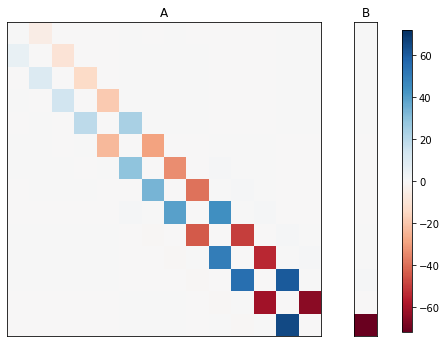

In [10]:
lorh.show_regression().show()

In [11]:
lorh.show_regression_numerical()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00,-5.12,-0.00,-0.12,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
1,5.11,-0.01,-9.93,-0.00,-0.19,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
2,-0.00,9.90,-0.02,-13.59,-0.00,0.25,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
3,0.11,-0.05,13.53,-0.05,-18.93,0.00,0.33,0.00,0.01,-0.00,-0.00,-0.00,0.00,0.00
4,-0.01,0.15,-0.05,18.85,-0.03,23.28,0.00,0.41,0.00,-0.01,-0.00,-0.00,0.00,0.00
5,0.00,0.05,-0.19,0.09,-23.21,-0.04,-28.94,-0.00,-0.51,0.00,0.01,0.00,-0.00,-0.00
6,0.00,0.01,0.02,-0.30,0.02,28.91,-0.00,-33.56,-0.00,0.59,0.00,0.01,-0.00,-0.00
7,-0.00,0.01,0.00,0.01,-0.40,-0.01,33.56,-0.00,-39.30,0.00,0.69,0.00,-0.01,-0.00
8,-0.00,-0.04,-0.04,-0.08,-0.06,0.57,0.02,39.30,-0.02,44.03,0.00,0.78,-0.00,-0.01
9,0.01,0.05,0.06,0.10,0.09,-0.09,-0.62,-0.01,-43.96,-0.05,-49.90,-0.00,0.89,0.00


<br><br>

### Simulation on train dataset, just for curiosity

In [12]:
vhavok, thavok = lorh.simulate_system(init = 'train')

[sym] using train dataset mode


In [13]:
idx = np.arange(int(0/dt),int(50/dt))

t_test = thavok
v1_havok = vhavok[:,0]
forcing = lorh.svd_v[14,idx]

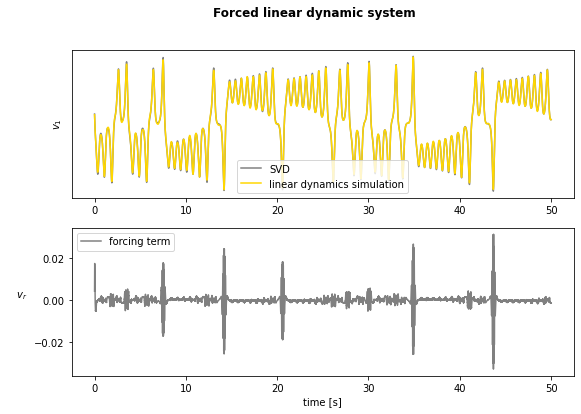

In [14]:
lorh.plot_simulation(0, 50).show()

<br><br>

### Simulation on test dataset (not seen by previous analysis)

In [15]:
#lorh.compute_test_dataset()  # should do this before simulating on test dataset...
vhavok, thavok = lorh.simulate_system(init = 'test')  # ... but he's smart & does it for you!

[sym] WARNING: test dataset not initialized, I do it for you
[mw] done
[sym] using test dataset mode


In [16]:
t_test = thavok
v_mw = lorh.test_mowin
v1_havok = vhavok[:,0]
forcing = v_mw[:,-1]

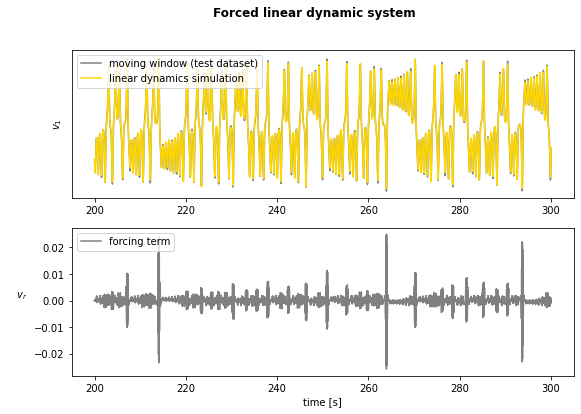

In [17]:
lorh.plot_simulation(0, 100).show() # simulation time, always!

<br><br>

### Simulation with forcing term activity

Once you define what means that the forcing term is 'active' (i.e. you write a function for it), the simulation plot changes its behaviour and shows you the activity colored by red.

In [18]:
def activity_by_threshold(forcing):
    
    thres = 0.002  # suggested from paper
    
    above_thres = abs(forcing) > thres
    thres_expand = 500
    switch = False
    for i in range(0,len(above_thres)):
        if above_thres[i]:
            if not switch:
                above_thres[i:i+thres_expand] = True
                switch = True
        else:
            switch = False
    
    return above_thres

lorh.set_activity_criteria( activity_by_threshold )

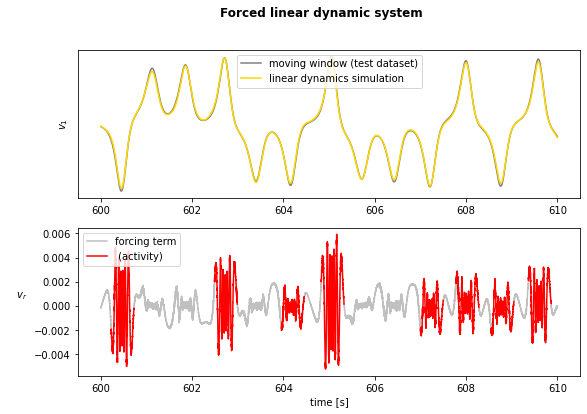

In [19]:
lorh.plot_simulation(400, 410).show()

***

Code by *Francesco Barone*, last review: 31 may 2022. <br>**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo.

University of Padua, **Laboratory of Computational Physics**, module B.